Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

## Data Understanding

### Collecting Data

In [6]:
DM2019_kepesertaan=pd.read_stata ('DM2019_kepesertaan.dta')
DM2019_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF,NaN
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF,NaN
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF,NaN
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL,2019.0
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF,NaN


In [7]:
DM2020_kepesertaan=pd.read_stata ('DM2020_kepesertaan.dta')
DM2020_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2020,AKTIF,NaN
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2020,AKTIF,NaN
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2020,AKTIF,NaN
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2020,AKTIF,NaN
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2020,AKTIF,NaN


In [8]:
DM2021_kepesertaan=pd.read_stata ('DM2021_kepesertaan.dta')
DM2021_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2021,AKTIF,NaN
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2021,AKTIF,NaN
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2021,AKTIF,NaN
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2021,AKTIF,NaN
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2021,AKTIF,NaN


In [9]:
TB2019_kepesertaan=pd.read_stata ('TB2019_kepesertaan.dta')
TB2019_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,21611150,21611150,1957-09-12,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,ACEH BESAR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BESAR,1.157796,2019,AKTIF,NaN
1,94343049,96772919,1961-12-03,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.556821,2019,AKTIF,NaN
2,83393824,298548714,2002-10-05,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.159913,2019,AKTIF,NaN
3,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,9.436164,2019,AKTIF,NaN
4,67805935,67805935,1972-11-13,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,0.899331,2019,AKTIF,NaN


In [10]:
TB2020_kepesertaan=pd.read_stata ('TB2020_kepesertaan.dta')
TB2020_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2020,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2020,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2020,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2020,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2020,AKTIF,NaN


In [11]:
TB2021_kepesertaan=pd.read_stata ('TB2021_kepesertaan.dta')
TB2021_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2021,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2021,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2021,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2021,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2021,AKTIF,NaN


In [12]:
reguler_kepesertaan=pd.read_stata ('2015202101_kepesertaan.dta')
reguler_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,135798314,6326929,1997-03-01,ANAK,LAKI-LAKI,TIDAK TERDEFINISI,KELAS III,PBI APBN,JAWA TENGAH,TEMANGGUNG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,TEMANGGUNG,79.944771,2016,TIDAK AKTIF,NaN
1,135821984,135821984,1956-08-01,PESERTA,LAKI-LAKI,TIDAK TERDEFINISI,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,76.267944,2016,TIDAK AKTIF,NaN
2,47640415,97101523,1993-10-01,ANAK,PEREMPUAN,CERAI,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,227.123001,2016,AKTIF,NaN
3,95736990,43313628,1965-09-01,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,41.915855,2016,AKTIF,NaN
4,66860922,70450667,2010-06-24,TAMBAHAN,LAKI-LAKI,BELUM KAWIN,KELAS III,PBI APBN,JAWA TENGAH,TEMANGGUNG,SWASTA,DOKTER UMUM,JAWA TENGAH,TEMANGGUNG,21.220556,2016,AKTIF,NaN


Merge Dataset (Data Integration)

In [13]:
df = [DM2019_kepesertaan,DM2020_kepesertaan,DM2021_kepesertaan,TB2019_kepesertaan,TB2020_kepesertaan,TB2021_kepesertaan,reguler_kepesertaan]
merge_df = pd.concat(df)

In [14]:
print(merge_df.shape)
merge_df.head()

(3020821, 18)


,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF,NaN
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF,NaN
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF,NaN
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL,2019.0
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF,NaN


### Describe Data

In [15]:
merge_df.describe()

,PSTV01,PSTV02,PSTV15,PSTV16,PSTV18
count,3.020821e+06,3.020821e+06,3.020821e+06,3.020821e+06,111067.000000
mean,1.434884e+08,1.424649e+08,8.893610e+01,2.017568e+03,2019.016179
std,1.203137e+08,1.213148e+08,2.353842e+02,1.961516e+00,1.669029
min,1.500000e+01,1.500000e+01,1.568037e-01,2.016000e+03,2014.000000
25%,5.104401e+07,4.962626e+07,8.332311e+00,2.016000e+03,2019.000000
50%,1.033770e+08,9.925007e+07,2.283859e+01,2.016000e+03,2019.000000
75%,1.990410e+08,1.985788e+08,8.855906e+01,2.020000e+03,2020.000000
max,4.605590e+08,4.605590e+08,5.386168e+04,2.021000e+03,2021.000000


from matplotlib import pyplot as plt
_df_0['PSTV01'].plot(kind='hist', bins=20, title='PSTV01')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PSTV02'].plot(kind='hist', bins=20, title='PSTV02')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PSTV15'].plot(kind='hist', bins=20, title='PSTV15')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PSTV16'].plot(kind='hist', bins=20, title='PSTV16')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PSTV01', y='PSTV02', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PSTV02', y='PSTV15', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PSTV15', y='PSTV16', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PSTV16', y='PSTV18', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PSTV01'].plot(kind='line', figsize=(8, 4), title='PSTV01')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PSTV02'].plot(kind='line', figsize=(8, 4), title='PSTV02')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PSTV15'].plot(kind='line', figsize=(8, 4), title='PSTV15')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PSTV16'].plot(kind='line', figsize=(8, 4), title='PSTV16')
plt.gca().spines[['top', 'right']].set_visible(False)

### Validation Data

In [16]:
print(merge_df.shape)
merge_df.info()

(3020821, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020821 entries, 0 to 2305434
Data columns (total 18 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PSTV01  int32         
 1   PSTV02  int32         
 2   PSTV03  datetime64[ns]
 3   PSTV04  category      
 4   PSTV05  category      
 5   PSTV06  object        
 6   PSTV07  object        
 7   PSTV08  object        
 8   PSTV09  category      
 9   PSTV10  object        
 10  PSTV11  object        
 11  PSTV12  object        
 12  PSTV13  object        
 13  PSTV14  object        
 14  PSTV15  float32       
 15  PSTV16  int16         
 16  PSTV17  object        
 17  PSTV18  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(1), int16(1), int32(2), object(9)
memory usage: 325.5+ MB


## Data Preparation

### Data Cleaning

In [17]:
# checking missing value
merge_df.isna().sum()

PSTV01          0
PSTV02          0
PSTV03          0
PSTV04          0
PSTV05          0
PSTV06          0
PSTV07          0
PSTV08          0
PSTV09          0
PSTV10          0
PSTV11          0
PSTV12          0
PSTV13          0
PSTV14          0
PSTV15          0
PSTV16          0
PSTV17          0
PSTV18    2909754
dtype: int64

Berdasarkan output missing value diatas, kolom `PSTV18` memiliki nilai yang cenderung kosong. Maka akan dilakukan drop terhadap kolom sebagai solusinya

In [18]:
merge_df.drop(['PSTV18'], inplace=True, axis = 1)
merge_df

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,290698984,290698984,1965-05-14,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,JAWA BARAT,KOTA TASIKMALAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,KOTA TASIKMALAYA,3312.561035,2019,AKTIF
2305431,402778434,391518127,2013-03-17,ANAK,PEREMPUAN,BELUM KAWIN,KELAS II,PPU,JAWA TIMUR,JEMBER,SWASTA,DOKTER UMUM,JAWA TIMUR,SAMPANG,54.075462,2019,AKTIF
2305432,372419310,372419310,1958-02-10,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA BARAT,BANDUNG BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,BANDUNG BARAT,60.153950,2019,AKTIF
2305433,341838920,341838920,1992-03-26,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,SRAGEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,SRAGEN,465.500214,2019,AKTIF


In [19]:
merge_df.dropna()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,290698984,290698984,1965-05-14,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,JAWA BARAT,KOTA TASIKMALAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,KOTA TASIKMALAYA,3312.561035,2019,AKTIF
2305431,402778434,391518127,2013-03-17,ANAK,PEREMPUAN,BELUM KAWIN,KELAS II,PPU,JAWA TIMUR,JEMBER,SWASTA,DOKTER UMUM,JAWA TIMUR,SAMPANG,54.075462,2019,AKTIF
2305432,372419310,372419310,1958-02-10,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA BARAT,BANDUNG BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,BANDUNG BARAT,60.153950,2019,AKTIF
2305433,341838920,341838920,1992-03-26,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,SRAGEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,SRAGEN,465.500214,2019,AKTIF


In [20]:
# checking duplicate value
merge_df.duplicated().sum()

113117

In [21]:
merge_df.drop_duplicates(inplace=True)

In [22]:
print("Jumlah duplikasi: ", merge_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
print(merge_df.shape)
merge_df.info()

(2907704, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907704 entries, 0 to 2305434
Data columns (total 17 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PSTV01  int32         
 1   PSTV02  int32         
 2   PSTV03  datetime64[ns]
 3   PSTV04  category      
 4   PSTV05  category      
 5   PSTV06  object        
 6   PSTV07  object        
 7   PSTV08  object        
 8   PSTV09  category      
 9   PSTV10  object        
 10  PSTV11  object        
 11  PSTV12  object        
 12  PSTV13  object        
 13  PSTV14  object        
 14  PSTV15  float32       
 15  PSTV16  int16         
 16  PSTV17  object        
dtypes: category(3), datetime64[ns](1), float32(1), int16(1), int32(2), object(9)
memory usage: 291.2+ MB


### Data Transformation

In [24]:
def label_encode_columns(dataframe, columns):
    le = LabelEncoder()
    for column in columns:
        # Check if the column contains any non-numeric values
        if not pd.api.types.is_numeric_dtype(dataframe[column]):
            # If not numeric, convert the column to string before applying LabelEncoder
            dataframe[column] = dataframe[column].astype(str)

        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

# Example usage
columns_to_encode = ['PSTV02','PSTV04', 'PSTV05', 'PSTV06', 'PSTV07', 'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11',
                     'PSTV12', 'PSTV13', 'PSTV14', 'PSTV15']

merge_encode = label_encode_columns(merge_df, columns_to_encode)

In [25]:
merge_encode.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,244485,1959-10-11,2,1,2,1,6,0,402,2,3,0,402,72364,2020,AKTIF
1,356470819,985323,1965-12-31,2,0,2,1,6,0,171,2,3,0,171,58346,2020,AKTIF
2,72280409,1009059,1964-08-03,1,1,1,1,1,33,42,2,3,33,42,48412,2020,AKTIF
3,88501975,478252,1959-10-02,2,1,2,1,6,33,13,2,3,33,13,65483,2020,MENINGGAL
4,94870095,928532,1947-01-01,3,0,2,1,1,31,401,2,3,31,401,63809,2020,AKTIF


### Data Selection (Feature Selection)

<ipython-input-26-4c9aa7bae83b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_encode.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')


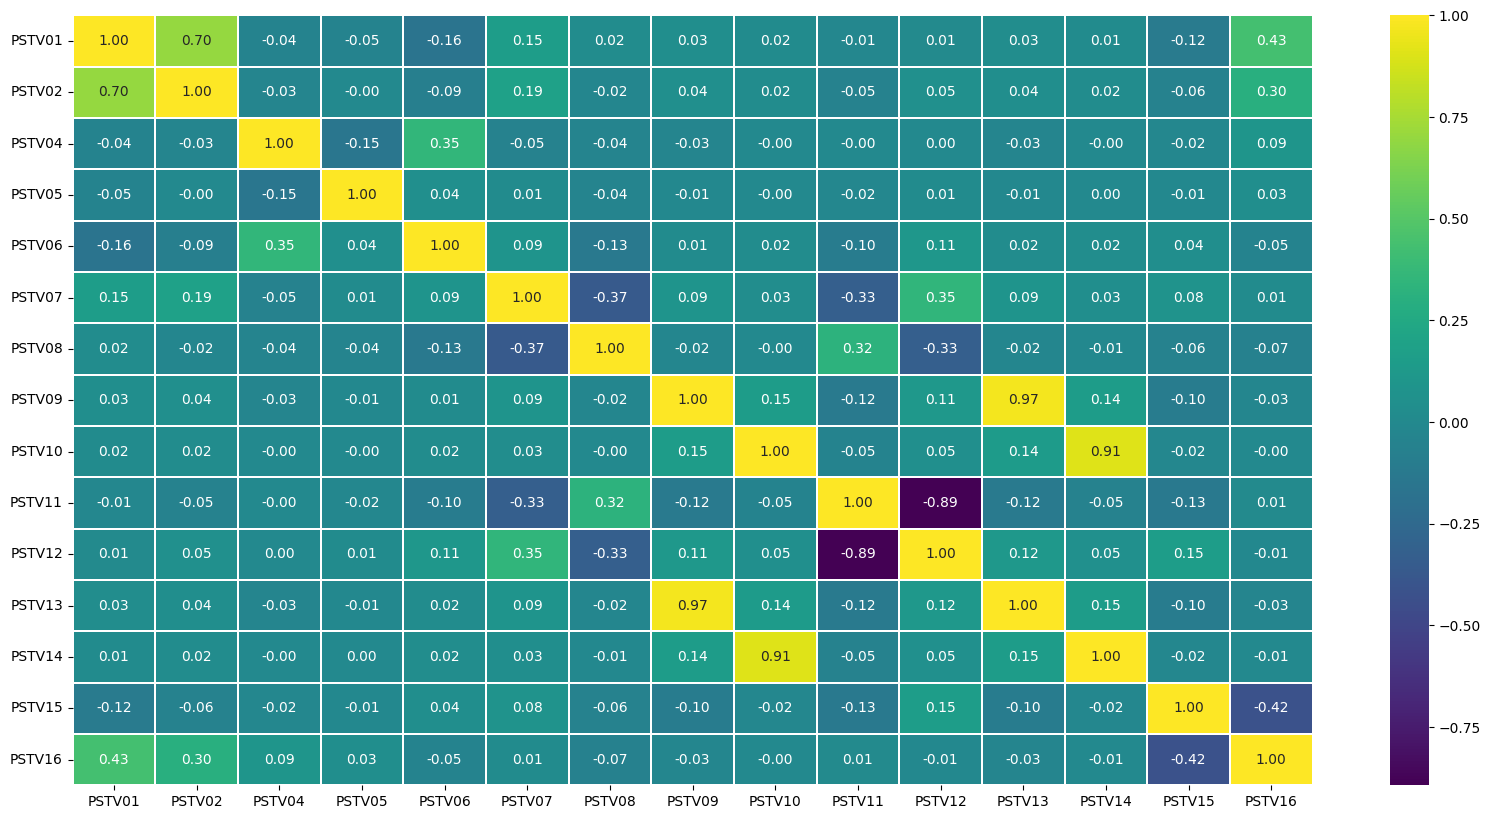

In [26]:
# Matrix Correlation with Heatmap
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(merge_encode.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.show()

In [27]:
merge_encode.columns

Index(['PSTV01', 'PSTV02', 'PSTV03', 'PSTV04', 'PSTV05', 'PSTV06', 'PSTV07',
       'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11', 'PSTV12', 'PSTV13', 'PSTV14',
       'PSTV15', 'PSTV16', 'PSTV17'],
      dtype='object')

In [28]:
to_drop = ['PSTV01','PSTV03']
merge_encode.drop(to_drop, inplace=True, axis = 1)
merge_encode

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,2020,AKTIF
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,2020,AKTIF
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,2020,AKTIF
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,2020,MENINGGAL
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,904168,2,0,2,3,4,8,260,2,3,8,260,211530,2019,AKTIF
2305431,1028209,0,1,0,2,6,10,127,5,0,10,428,117447,2019,AKTIF
2305432,1004884,2,1,2,3,4,8,18,2,3,8,18,119617,2019,AKTIF
2305433,967284,2,1,2,3,4,9,458,2,3,9,458,182818,2019,AKTIF


Alasan dilakukan drop karena `PSTV01`merupakan index dari pendataan kepesertaan, sementara `PSTV03`merupakan tanggal lahir dari peserta, sehingga kurang relevan apabila digunakan sebagai input dalam model

### Data Labelling

In [29]:
merge_encode['PSTV17'].value_counts()

AKTIF          1948858
TIDAK AKTIF     856018
MENINGGAL       102735
99                  92
30                   1
Name: PSTV17, dtype: int64

In [30]:
merge_encode['PSTV17'] = merge_encode['PSTV17'].map({'AKTIF': 1, 'TIDAK AKTIF': 0, 'MENINGGAL': 0, '99': 0, '30': 0})

In [31]:
merge_encode['PSTV17'].value_counts()

1.0    1948858
0.0     958753
Name: PSTV17, dtype: int64

In [32]:
merge_encode.head()

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,2020,1.0
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,2020,1.0
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,2020,1.0
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,2020,0.0
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,2020,1.0


In [33]:
merge_encode.isna().sum()

PSTV02     0
PSTV04     0
PSTV05     0
PSTV06     0
PSTV07     0
PSTV08     0
PSTV09     0
PSTV10     0
PSTV11     0
PSTV12     0
PSTV13     0
PSTV14     0
PSTV15     0
PSTV16     0
PSTV17    93
dtype: int64

In [34]:
clean_df = merge_encode.dropna()
clean_df.head()

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,2020,1.0
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,2020,1.0
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,2020,1.0
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,2020,0.0
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,2020,1.0


In [35]:
clean_df.isna().sum()

PSTV02    0
PSTV04    0
PSTV05    0
PSTV06    0
PSTV07    0
PSTV08    0
PSTV09    0
PSTV10    0
PSTV11    0
PSTV12    0
PSTV13    0
PSTV14    0
PSTV15    0
PSTV16    0
PSTV17    0
dtype: int64

## Build Test Scenario

In [36]:
X = clean_df.drop('PSTV17', axis = 1)
y = clean_df['PSTV17']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((2326088, 14), (581523, 14))

In [40]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

### Evaluation

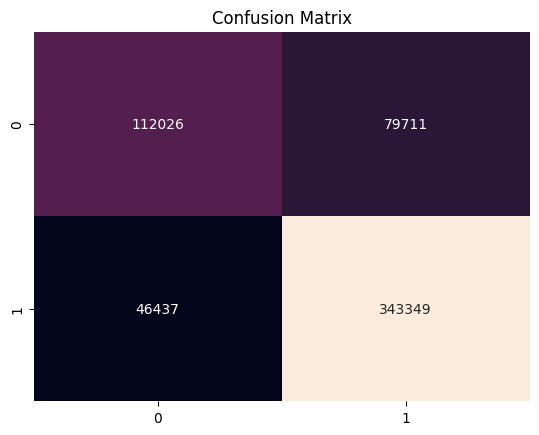

In [41]:
y_pred_dc = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, y_pred_dc)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y_test, y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64    191737
         1.0       0.81      0.88      0.84    389786

    accuracy                           0.78    581523
   macro avg       0.76      0.73      0.74    581523
weighted avg       0.78      0.78      0.78    581523

precision_score: 0.81158464520399
accuracy_score: 0.7830730684770851
recall_score: 0.8808653979363035
